<a href="https://colab.research.google.com/github/AkotoChristine/Hidden-Markov-Model/blob/main/HMM__Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.fft import fft, fftfreq
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

# Define colors for activities
activity_colors = {
    'standing': '#1f77b4',
    'walking': '#ff7f0e',
    'jumping': '#2ca02c',
    'still': '#d62728'
}

In [8]:
features_df = pd.read_csv('/content/extracted_train_features.csv')
test_data =  pd.read_csv('/content/extracted_test_features.csv')

In [9]:
features_df.head()

,acc_x_mean,acc_x_std,acc_x_var,acc_x_min,acc_x_max,acc_x_range,acc_x_median,acc_x_mad,acc_x_rms,acc_x_skewness,...,gyr_sma,gyr_smv,gyr_corr_xy,gyr_corr_xz,gyr_corr_yz,activity,subject,session,window_id,source_file
0,0.192972,0.192863,0.037196,-0.495746,0.449528,0.945274,0.218121,0.114050,0.272827,-1.268229,...,0.313703,0.205450,-0.563543,-0.166633,-0.194811,standing2,Jean,2,0,combined_train_data_wide.csv
1,0.130448,0.110917,0.012303,-0.107177,0.310913,0.418090,0.149196,0.083772,0.171229,-0.422248,...,0.268134,0.173778,-0.504231,-0.027873,-0.460709,standing2,Jean,2,1,combined_train_data_wide.csv
2,0.091788,0.118491,0.014040,-0.107177,0.321962,0.429139,0.077621,0.093758,0.149884,0.329404,...,0.175731,0.115113,-0.227269,-0.183002,-0.172011,standing2,Jean,2,2,combined_train_data_wide.csv
3,0.038348,0.096451,0.009303,-0.116963,0.321962,0.438925,0.023643,0.062383,0.103795,0.963359,...,0.155097,0.103740,-0.457841,-0.111434,-0.076926,standing2,Jean,2,3,combined_train_data_wide.csv
4,0.029360,0.102661,0.010539,-0.153130,0.229175,0.382305,0.033409,0.084361,0.106777,0.111862,...,0.136463,0.090295,-0.578205,-0.175699,-0.371998,standing2,Jean,2,4,combined_train_data_wide.csv


In [10]:
print(features_df.shape, test_data.shape) # train_data.shape, test_data.shape

(1208, 123) (367, 123)


In [11]:
print(features_df.columns.tolist)

<bound method IndexOpsMixin.tolist of Index(['acc_x_mean', 'acc_x_std', 'acc_x_var', 'acc_x_min', 'acc_x_max',
       'acc_x_range', 'acc_x_median', 'acc_x_mad', 'acc_x_rms',
       'acc_x_skewness',
       ...
       'gyr_sma', 'gyr_smv', 'gyr_corr_xy', 'gyr_corr_xz', 'gyr_corr_yz',
       'activity', 'subject', 'session', 'window_id', 'source_file'],
      dtype='object', length=123)>


In [12]:
features_df.drop(columns=['source_file'], inplace=True), test_data.drop(columns=['source_file'], inplace=True)

(None, None)

In [13]:
test_data.head(5)

,acc_x_mean,acc_x_std,acc_x_var,acc_x_min,acc_x_max,acc_x_range,acc_x_median,acc_x_mad,acc_x_rms,acc_x_skewness,...,acc_corr_yz,gyr_sma,gyr_smv,gyr_corr_xy,gyr_corr_xz,gyr_corr_yz,activity,subject,session,window_id
0,-0.015123,0.085285,0.007274,-0.171210,0.172360,0.343570,-0.014965,0.065722,0.086615,-0.132085,...,-0.323340,0.082009,0.056786,0.158072,0.238277,0.052802,standing8,Jean,8,0
1,0.009499,0.086401,0.007465,-0.208689,0.138782,0.347472,0.036865,0.053930,0.086922,-0.791803,...,-0.320594,0.071908,0.049370,-0.131949,0.031749,-0.080576,standing8,Jean,8,1
2,0.009138,0.075390,0.005684,-0.208689,0.138782,0.347472,0.004663,0.043718,0.075942,-0.817064,...,-0.301966,0.068318,0.044225,0.591124,0.227265,0.059238,standing8,Jean,8,2
3,-0.006388,0.051174,0.002619,-0.108277,0.110761,0.219037,0.000689,0.034623,0.051572,-0.017052,...,-0.162716,0.078880,0.051618,0.529714,0.302380,-0.073445,standing8,Jean,8,3
4,-0.025488,0.057760,0.003336,-0.108277,0.094240,0.202517,-0.022584,0.049552,0.063134,0.405779,...,0.115740,0.082356,0.054698,-0.061533,0.517865,-0.175328,standing8,Jean,8,4


In [14]:
features_df.isnull().sum()

,0
acc_x_mean,0
acc_x_std,0
acc_x_var,0
acc_x_min,0
acc_x_max,0
...,...
gyr_corr_yz,0
activity,0
subject,0
session,0


In [15]:
numeric_features = features_df.select_dtypes(include=[np.number]).columns
print(features_df[numeric_features[:10]].describe())

print("\n3.5 Activities in Features:")
feature_activity_counts = features_df['activity'].value_counts().sort_index()
print(feature_activity_counts)

        acc_x_mean    acc_x_std    acc_x_var    acc_x_min    acc_x_max  \
count  1208.000000  1208.000000  1208.000000  1208.000000  1208.000000   
mean      0.031742     0.579105     1.289630    -1.376552     1.071414   
std       0.353596     0.977271     4.170029     2.871378     1.725160   
min      -1.948673     0.002905     0.000008   -20.833050    -0.467043   
25%      -0.016338     0.034056     0.001160    -1.265928     0.035139   
50%       0.004098     0.131501     0.017293    -0.208070     0.271146   
75%       0.092852     0.610927     0.373232    -0.036212     1.373382   
max       1.932391     5.993217    35.918653     0.957016    15.832397   

       acc_x_range  acc_x_median    acc_x_mad    acc_x_rms  acc_x_skewness  
count  1208.000000   1208.000000  1208.000000  1208.000000     1208.000000  
mean      2.447966      0.104371     0.316787     0.643081       -0.110998  
std       4.260643      0.421417     0.487861     1.001420        0.651051  
min       0.012323     -1

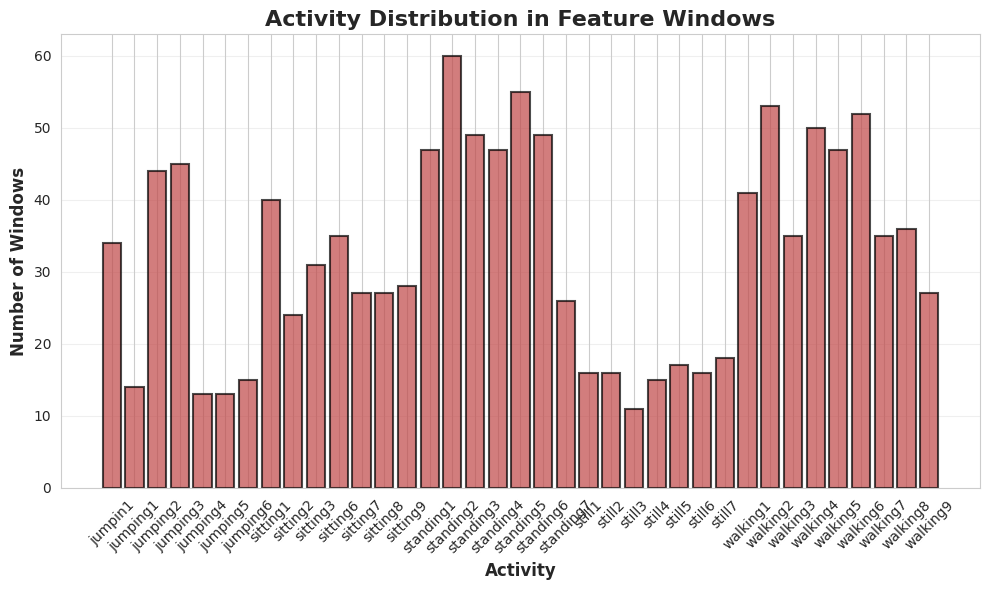

In [16]:
plt.figure(figsize=(10, 6))
colors_list = [activity_colors.get(act.lower(), "#C04646") for act in feature_activity_counts.index]
bars = plt.bar(feature_activity_counts.index, feature_activity_counts.values,
               color=colors_list, alpha=0.7, edgecolor='black', linewidth=1.5)
plt.title('Activity Distribution in Feature Windows', fontsize=16, fontweight='bold')
plt.xlabel('Activity', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Number of Windows', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')


plt.tight_layout()
plt.show()


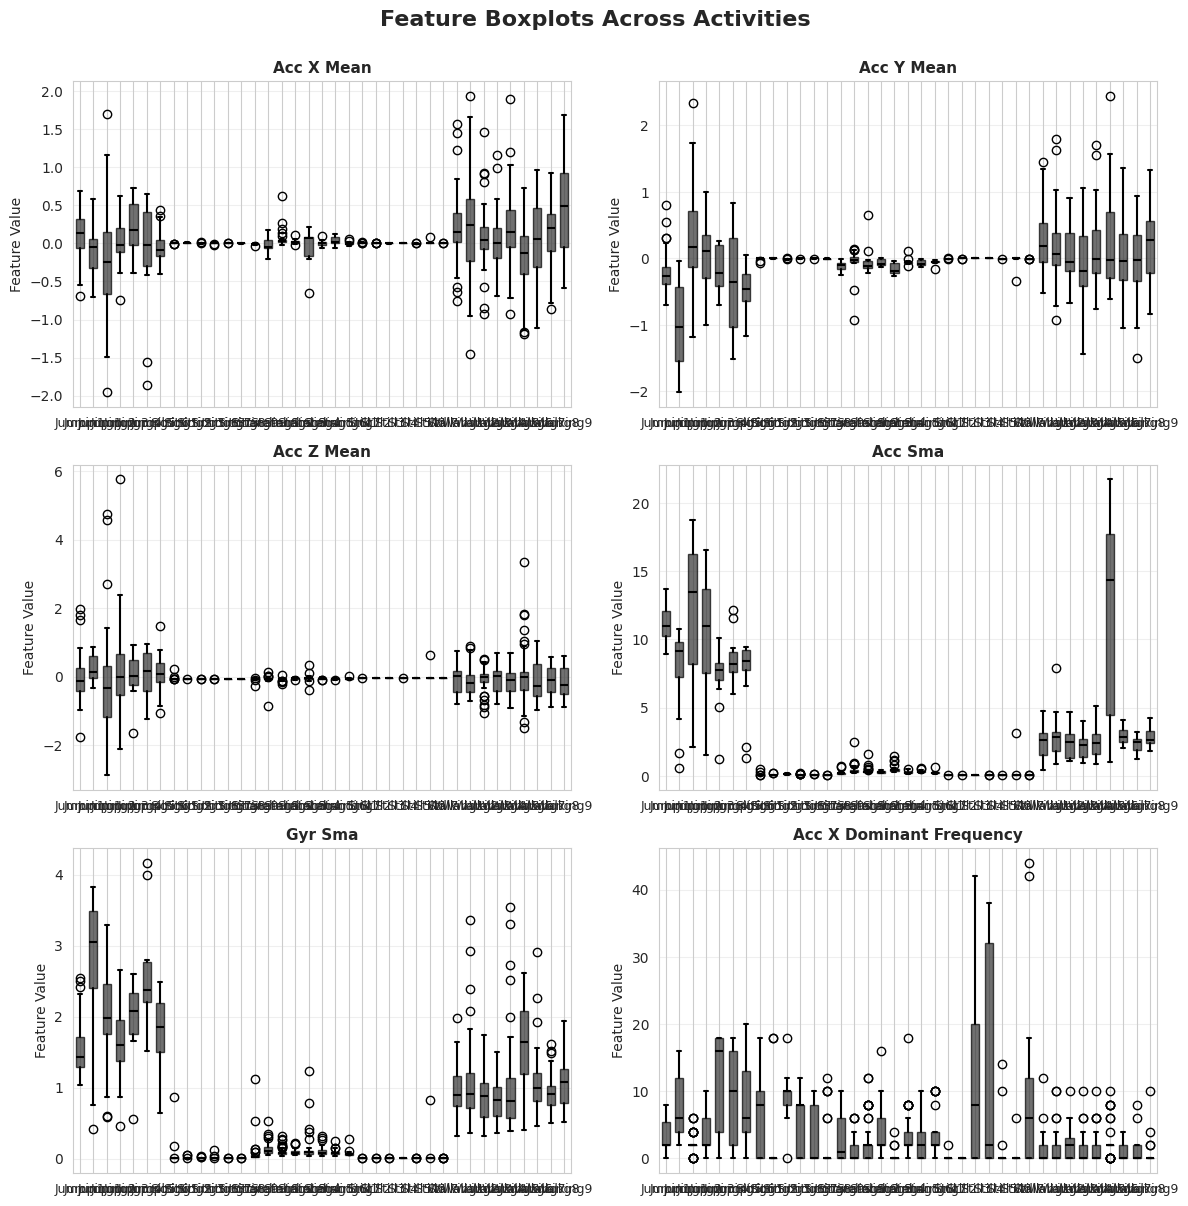

In [17]:
# Select features for boxplots
boxplot_features = [
    'acc_x_mean', 'acc_y_mean', 'acc_z_mean',
    'acc_sma', 'gyr_sma', 'acc_x_dominant_frequency'
]
boxplot_features = [f for f in boxplot_features if f in features_df.columns]

n_cols = 2
n_rows = (len(boxplot_features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if isinstance(axes, plt.Axes) else axes

for idx, feature in enumerate(boxplot_features):
    ax = axes[idx]

    data_to_plot = []
    labels = []
    colors_list = []

    for activity in sorted(features_df['activity'].unique()):
        activity_data = features_df[features_df['activity'] == activity][feature]
        data_to_plot.append(activity_data)
        labels.append(activity.capitalize())
        colors_list.append(activity_colors.get(activity.lower(), '#333333'))

    bp = ax.boxplot(data_to_plot, labels=labels, patch_artist=True, widths=0.6)

    for patch, color in zip(bp['boxes'], colors_list):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

    for element in ['whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color='black', linewidth=1.5)

    ax.set_title(feature.replace('_', ' ').title(), fontweight='bold', fontsize=11)
    ax.set_ylabel('Feature Value', fontsize=10)
    ax.grid(True, alpha=0.3, axis='y')
    ax.tick_params(axis='x', labelsize=9)

# Hide unused subplots
for idx in range(len(boxplot_features), len(axes)):
    axes[idx].axis('off')

plt.suptitle('Feature Boxplots Across Activities', fontsize=16, fontweight='bold', y=1.001)
plt.tight_layout()
plt.show()


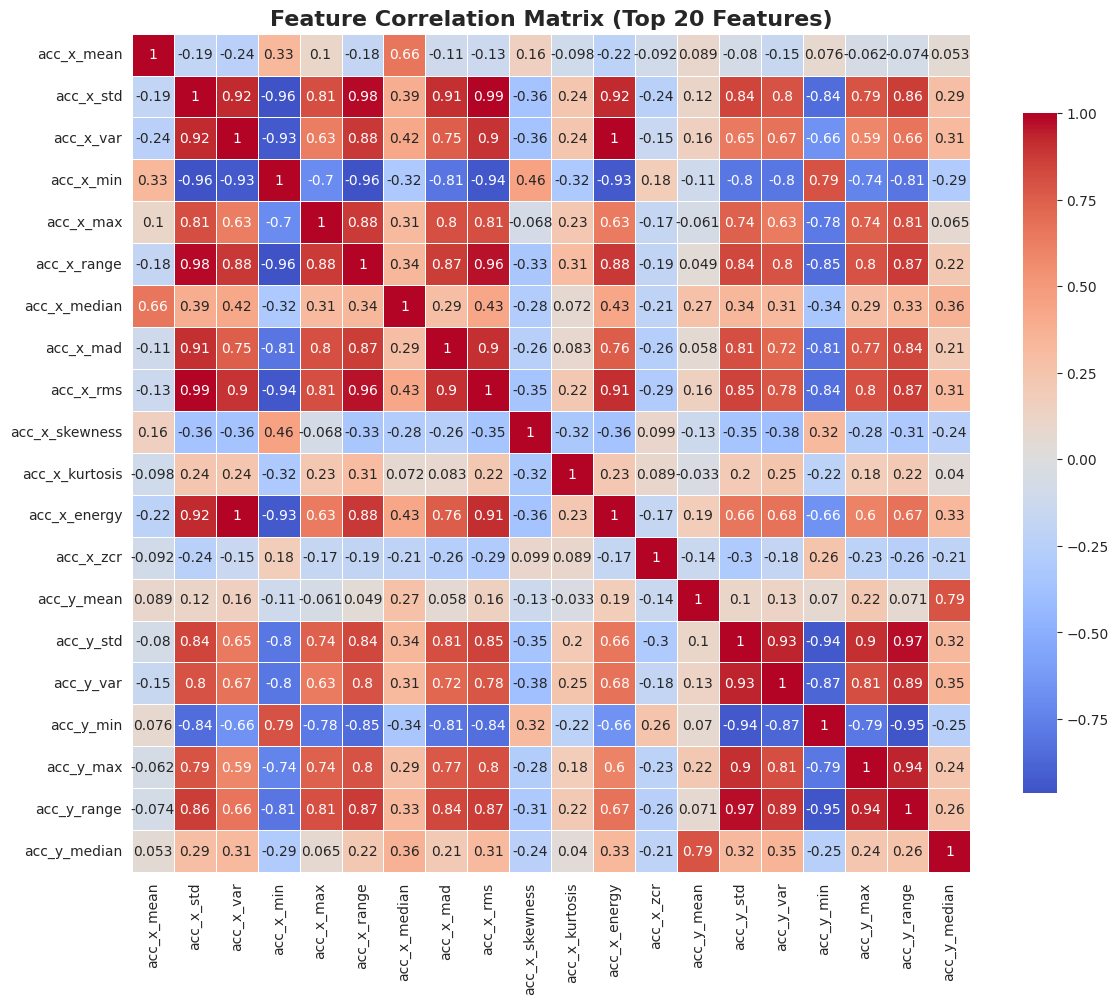

In [18]:
numeric_cols = features_df.select_dtypes(include=[np.number]).columns
exclude_cols = ['window_id', 'session']
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

# Limit to top features for clearer visualization
top_n = 20
if len(numeric_cols) > top_n:
    numeric_cols = numeric_cols[:top_n]

# Calculate correlation matrix
corr_matrix = features_df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix,
           annot=True,
           cmap='coolwarm',
           center=0,
           square=True,
           linewidths=0.5,
           cbar_kws={"shrink": 0.8})

plt.title('Feature Correlation Matrix (Top 20 Features)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

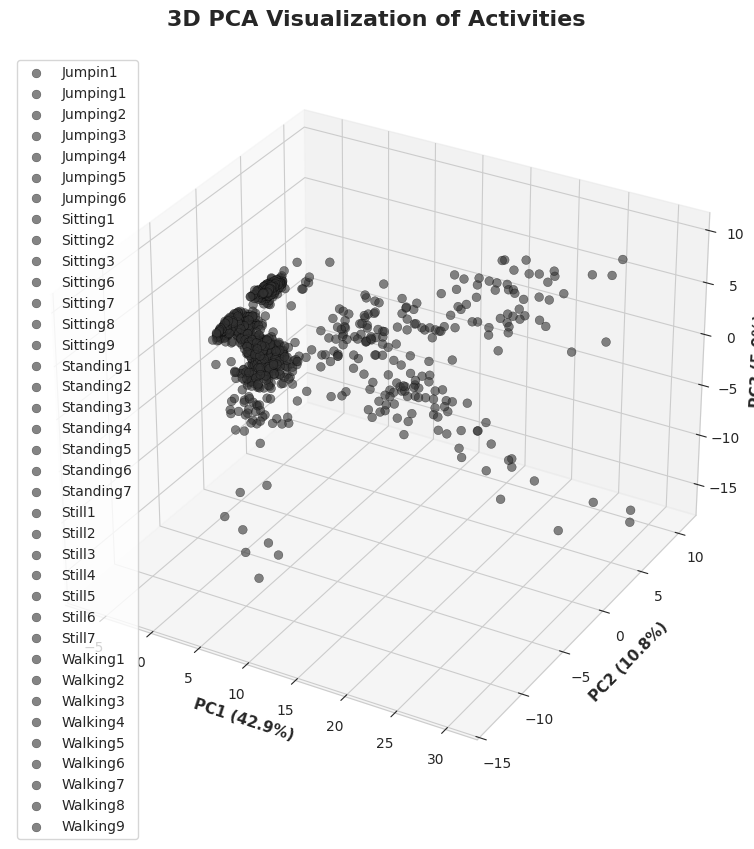

In [19]:

numeric_cols = features_df.select_dtypes(include=[np.number]).columns
exclude_cols = ['window_id', 'session']
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

X = features_df[numeric_cols].fillna(0).values
y = features_df['activity'].values

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# Apply PCA with 3 components
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Create 3D plot
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

for activity in sorted(set(y)):
    mask = y == activity
    color = activity_colors.get(activity.lower(), '#333333')
    ax.scatter(X_pca_3d[mask, 0],
              X_pca_3d[mask, 1],
              X_pca_3d[mask, 2],
              label=activity.capitalize(),
              alpha=0.6,
              color=color,
              s=40,
              edgecolors='black',
              linewidth=0.3)

ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.1%})',
             fontsize=11, fontweight='bold')
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.1%})',
             fontsize=11, fontweight='bold')
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.1%})',
             fontsize=11, fontweight='bold')
ax.set_title('3D PCA Visualization of Activities', fontsize=16, fontweight='bold', pad=20)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Define Model Components

In [30]:
import re
from sklearn.preprocessing import LabelEncoder

# Load preprocessed or merged feature data
train_data = pd.read_csv('/content/extracted_train_features.csv')
test_data = pd.read_csv('/content/extracted_test_features.csv')


def clean_label(label):
    return re.sub('[^a-zA-Z]', '', str(label)).lower().strip()

train_data['activity'] = train_data['activity'].apply(clean_label)


# Encode unique activity labels (hidden states)
le = LabelEncoder()
le.fit(train_data['activity'])
states = le.classes_
n_states = len(states)

print(f" Hidden States (Activities): {states}")
print(f" Number of States (n): {n_states}")

# Hidden States (Z)
hidden_states = states

observation_description = "Feature vectors derived from accelerometer and gyroscope signals (time + frequency domain)."

# Transition Probability Matrix (A)
A = np.full((n_states, n_states), 1.0 / n_states)

# Emission Probabilities (B)
B_description = "Emission probabilities are modeled as Gaussian distributions over features."

# Initial State Probabilities (π)
pi = np.full(n_states, 1.0 / n_states)

print("\n--- HMM Components Defined ---")
print(f"Hidden States (Z): {hidden_states}")
print(f"Transition Matrix (A) shape: {A.shape}")
print(f"Initial Probabilities (π): {pi}")
print(f"Emission Model: {B_description}")

hmm_components = {
    "states": hidden_states,
    "transition_matrix": A,
    "initial_probs": pi,
    "emission_model": B_description,
    "observations": observation_description
}

print("\n HMM Components successfully defined and ready for training.")


 Hidden States (Activities): ['jumpin' 'jumping' 'nan' 'sitting' 'standing' 'still' 'walking']
 Number of States (n): 7

--- HMM Components Defined ---
Hidden States (Z): ['jumpin' 'jumping' 'nan' 'sitting' 'standing' 'still' 'walking']
Transition Matrix (A) shape: (7, 7)
Initial Probabilities (π): [0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
 0.14285714]
Emission Model: Emission probabilities are modeled as Gaussian distributions over features.

 HMM Components successfully defined and ready for training.


## Model Implementation

In [24]:
!pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 kB 2.6 MB/s eta 0:00:00


In [27]:
# Load and Prepare Data
train_data = pd.read_csv('/content/extracted_train_features.csv')
test_data = pd.read_csv('/content/extracted_test_features.csv')


In [28]:
train_data = train_data.dropna()
test_data = test_data.dropna()

In [29]:

from sklearn.preprocessing import StandardScaler, LabelEncoder
from hmmlearn import hmm
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
import joblib


# Clean activity labels
def clean_label(label):
    return re.sub('[^a-zA-Z]', '', str(label)).lower().strip()

train_data['activity'] = train_data['activity'].apply(clean_label)
test_data['activity'] = test_data['activity'].apply(clean_label)

# Drop non-numeric columns except target
non_numeric_cols = train_data.select_dtypes(include=['object']).columns.tolist()
non_numeric_cols = [col for col in non_numeric_cols if col != 'activity']

if non_numeric_cols:
    print(f" Dropping non-numeric columns: {non_numeric_cols}")
    train_data = train_data.drop(columns=non_numeric_cols)
    test_data = test_data.drop(columns=[c for c in non_numeric_cols if c in test_data.columns])

le = LabelEncoder()
le.fit(train_data['activity'])

# Split features and labels
X_train = train_data.drop(columns=['activity'])
y_train = train_data['activity']

X_test = test_data.drop(columns=['activity'])
y_test = test_data['activity']

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

joblib.dump(scaler, "trained_scaler.pkl")

print("Training global GaussianHMM...")

n_states = len(le.classes_)
global_hmm = hmm.GaussianHMM(
    n_components=n_states,
    covariance_type='diag',
    n_iter=100,
    random_state=42,
    init_params="stmc"
)

global_hmm.fit(X_train_scaled)

# Predict and evaluate
y_pred_global_enc = global_hmm.predict(X_test_scaled)
y_pred_global = le.inverse_transform(y_pred_global_enc)

acc_global = accuracy_score(y_test, y_pred_global)
f1_global = f1_score(y_test, y_pred_global, average='weighted')
precision_global = precision_score(y_test, y_pred_global, average='weighted')
recall_global = recall_score(y_test, y_pred_global, average='weighted')

print("\n Global HMM Performance:")
print(f"Accuracy:  {acc_global:.3f}")
print(f"F1-score:  {f1_global:.3f}")
print(f"Precision: {precision_global:.3f}")
print(f"Recall:    {recall_global:.3f}")
print(classification_report(y_test, y_pred_global))

# Per-Class Supervised HMMs
print("\n Training per-class supervised HMMs...")

class_models = {}
for state in le.classes_:
    X_class = X_train_scaled[y_train == state]
    if len(X_class) < n_states:
        print(f"Skipping class '{state}' (not enough samples).")
        continue

    model = hmm.GaussianHMM(
        n_components=1,
        covariance_type='diag',
        n_iter=100,
        random_state=42
    )
    model.fit(X_class)
    class_models[state] = model

# Predict by assigning each test sequence to the most likely class
y_pred_supervised = []
for x in X_test_scaled:
    scores = {label: m.score([x]) for label, m in class_models.items()}
    best_label = max(scores, key=scores.get)
    y_pred_supervised.append(best_label)

# Evaluate
acc_supervised = accuracy_score(y_test, y_pred_supervised)
f1_supervised = f1_score(y_test, y_pred_supervised, average='weighted')
precision_supervised = precision_score(y_test, y_pred_supervised, average='weighted')
recall_supervised = recall_score(y_test, y_pred_supervised, average='weighted')

print("\n Per-Class Supervised HMM Performance:")
print(f"Accuracy:  {acc_supervised:.3f}")
print(f"F1-score:  {f1_supervised:.3f}")
print(f"Precision: {precision_supervised:.3f}")
print(f"Recall:    {recall_supervised:.3f}")
print(classification_report(y_test, y_pred_supervised))

# Choose and Save Best Model
if acc_supervised >= acc_global:
    best_model = class_models
    joblib.dump(best_model, "trained_supervised_hmm.pkl")
    print("Saved best model: trained_supervised_hmm.pkl (Per-Class HMM)")
else:
    best_model = global_hmm
    joblib.dump(best_model, "trained_global_hmm.pkl")
    print("Saved best model: trained_global_hmm.pkl (Global HMM)")

print("\n Best model selected based on accuracy.")


 Dropping non-numeric columns: ['subject', 'source_file']
Training global GaussianHMM...

 Global HMM Performance:
Accuracy:  0.330
F1-score:  0.304
Precision: 0.302
Recall:    0.330
              precision    recall  f1-score   support

      jumpin       0.00      0.00      0.00         0
     jumping       0.62      0.45      0.52        96
     sitting       0.63      0.97      0.76        79
    standing       0.00      0.00      0.00        59
       still       0.00      0.00      0.00        48
     walking       0.02      0.01      0.01        85

    accuracy                           0.33       367
   macro avg       0.21      0.24      0.22       367
weighted avg       0.30      0.33      0.30       367


 Training per-class supervised HMMs...

 Per-Class Supervised HMM Performance:
Accuracy:  0.809
F1-score:  0.761
Precision: 0.733
Recall:    0.809
              precision    recall  f1-score   support

     jumping       0.97      0.89      0.92        96
     sitting     

## Model Evaluation with Unseen Data


In [31]:
import numpy as np
import pandas as pd
import joblib
import re
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


# Load Best Model and Scaler
try:
    best_model = joblib.load("trained_supervised_hmm.pkl")
    model_type = "Per-Class Supervised HMM"
except FileNotFoundError:
    try:
        best_model = joblib.load("trained_global_hmm.pkl")
        model_type = "Global GaussianHMM"
    except FileNotFoundError:
        raise FileNotFoundError("No trained model found. Please run Task 4 first.")

scaler = joblib.load("trained_scaler.pkl")
le = joblib.load("trained_label_encoder.pkl") if "trained_label_encoder.pkl" in locals() else None

print(f"Loaded model: {model_type}")
print("Scaler loaded successfully.")


# Load and Prepare Unseen Data
unseen_data = pd.read_csv("/content/extracted_test_features.csv")

def clean_label(label):
    return re.sub('[^a-zA-Z]', '', str(label)).lower().strip()

unseen_data['activity'] = unseen_data['activity'].apply(clean_label)

# Drop non-numeric columns except target
non_numeric_cols = unseen_data.select_dtypes(include=['object']).columns.tolist()
non_numeric_cols = [col for col in non_numeric_cols if col != 'activity']

if non_numeric_cols:
    print(f" Dropping non-numeric columns from unseen data: {non_numeric_cols}")
    unseen_data = unseen_data.drop(columns=non_numeric_cols)

# Split and scale features
X_unseen = unseen_data.drop(columns=['activity'])
y_unseen = unseen_data['activity']

X_unseen_scaled = scaler.transform(X_unseen)


# Predict Using the Loaded Model
print(f"\n Evaluating {model_type} on Unseen Data...")

if isinstance(best_model, dict):  # Per-class HMMs
    y_pred_unseen = []
    for x in X_unseen_scaled:
        scores = {label: m.score([x]) for label, m in best_model.items()}
        best_label = max(scores, key=scores.get)
        y_pred_unseen.append(best_label)
else:
    y_pred_unseen_enc = best_model.predict(X_unseen_scaled)
    y_pred_unseen = le.inverse_transform(y_pred_unseen_enc) if le else y_pred_unseen_enc


# Compute and Display Evaluation Metrics
acc = accuracy_score(y_unseen, y_pred_unseen)
f1 = f1_score(y_unseen, y_pred_unseen, average='weighted')
precision = precision_score(y_unseen, y_pred_unseen, average='weighted')
recall = recall_score(y_unseen, y_pred_unseen, average='weighted')

print("\n Model Performance on Unseen Data:")
print(f"Accuracy:  {acc:.3f}")
print(f"F1-score:  {f1:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print("\nDetailed Classification Report:")
print(classification_report(y_unseen, y_pred_unseen))


# Per-Activity Sensitivity, Specificity, and Overall Accuracy
states = sorted(list(set(y_unseen)))
cm = confusion_matrix(y_unseen, y_pred_unseen, labels=states)

results = []
for i, label in enumerate(states):
    TP = cm[i, i]
    FN = cm[i, :].sum() - TP
    FP = cm[:, i].sum() - TP
    TN = cm.sum() - (TP + FN + FP)
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    results.append([label, cm[i, :].sum(), round(sensitivity, 3), round(specificity, 3), round(acc, 3)])

perf_table = pd.DataFrame(results, columns=["Activity", "Samples", "Sensitivity", "Specificity", "Overall Accuracy"])

print("\n Evaluation Summary (Unseen Data):")
display(perf_table)


# Save Results for Report

perf_table.to_csv("evaluation_unseen_results.csv", index=False)
print("Saved unseen data evaluation results → evaluation_unseen_results.csv")


Loaded model: Per-Class Supervised HMM
Scaler loaded successfully.
 Dropping non-numeric columns from unseen data: ['subject', 'source_file']

 Evaluating Per-Class Supervised HMM on Unseen Data...

 Model Performance on Unseen Data:
Accuracy:  0.809
F1-score:  0.761
Precision: 0.733
Recall:    0.809

Detailed Classification Report:
              precision    recall  f1-score   support

     jumping       0.97      0.89      0.92        96
     sitting       0.63      0.97      0.76        79
    standing       0.98      0.90      0.94        59
       still       0.00      0.00      0.00        48
     walking       0.81      0.96      0.88        85

    accuracy                           0.81       367
   macro avg       0.68      0.74      0.70       367
weighted avg       0.73      0.81      0.76       367


 Evaluation Summary (Unseen Data):


,Activity,Samples,Sensitivity,Specificity,Overall Accuracy
0,jumping,96,0.885,0.989,0.809
1,sitting,79,0.975,0.840,0.809
2,standing,59,0.898,0.997,0.809
3,still,48,0.000,0.997,0.809
4,walking,85,0.965,0.933,0.809


Saved unseen data evaluation results → evaluation_unseen_results.csv


In [39]:
def aggregate_activities(activity_labels):
    """
    Map specific activities to main categories
    Still and Standing are treated as the same
    """
    aggregated = []
    for activity in activity_labels:
        activity_lower = str(activity).lower()

        if 'jump' in activity_lower:
            aggregated.append('jumping')
        elif 'walk' in activity_lower:
            aggregated.append('walking')
        elif 'sit' in activity_lower:
            aggregated.append('sitting')
        elif 'stand' in activity_lower or 'still' in activity_lower:
            aggregated.append('standing')  # Combine still and standing
        else:
            aggregated.append(activity_lower)

    return np.array(aggregated)

In [40]:
def plot_aggregated_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    """
    Plot confusion matrix with 4 main categories
    """
    # Aggregate activities
    y_true_agg = aggregate_activities(y_true)
    y_pred_agg = aggregate_activities(y_pred)

    # Define order for consistent display
    desired_order = ['jumping', 'walking', 'sitting', 'standing']
    classes_agg = [c for c in desired_order if c in np.unique(np.concatenate([y_true_agg, y_pred_agg]))]

    # Create confusion matrix
    cm = confusion_matrix(y_true_agg, y_pred_agg, labels=classes_agg)

    # Plot with larger font and better styling
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=[c.capitalize() for c in classes_agg],
                yticklabels=[c.capitalize() for c in classes_agg],
                cbar_kws={'label': 'Count'},
                annot_kws={'size': 14, 'weight': 'bold'},
                linewidths=2, linecolor='white')

    plt.title(title, fontsize=18, fontweight='bold', pad=20)
    plt.ylabel('True Activity', fontsize=14, fontweight='bold')
    plt.xlabel('Predicted Activity', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha='right', fontsize=13)
    plt.yticks(rotation=0, fontsize=13)
    plt.tight_layout()
    plt.show()

    return cm, classes_agg, y_true_agg, y_pred_agg

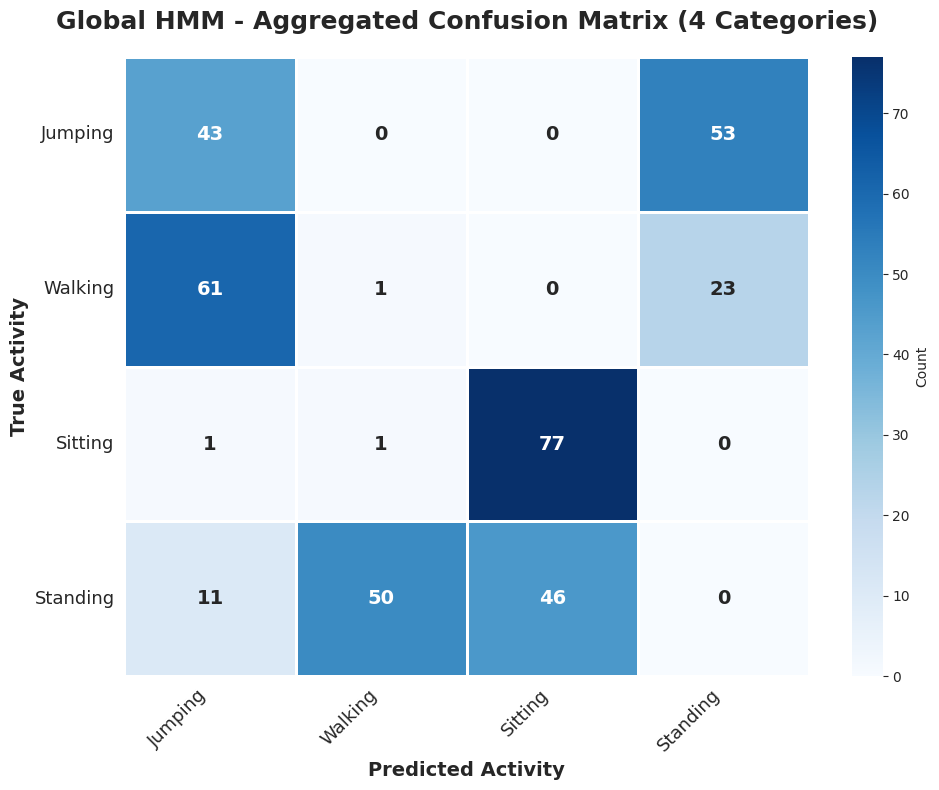

In [41]:
cm_agg, classes_agg, y_test_agg, y_pred_global_agg = plot_aggregated_confusion_matrix(
    y_test, y_pred_global,
    "Global HMM - Aggregated Confusion Matrix (4 Categories)"
)

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_aggregated_transition_probabilities(hmm_model, original_classes, aggregate_activities_fn):
    """
    Plot aggregated transition probabilities for an HMM.

    Parameters:
    - hmm_model: trained hmmlearn HMM (GaussianHMM) or dict of per-class HMMs
    - original_classes: list of class labels corresponding to states in the model
    - aggregate_activities_fn: function that maps original activity to aggregated category

    Returns:
    - agg_trans_matrix: aggregated transition probability matrix
    - agg_categories: list of aggregated activity categories
    """
    # --- Get transition matrix ---
    if isinstance(hmm_model, dict):
        # Per-class HMM: diagonal of 1-state HMM as self-transition
        n_states = len(original_classes)
        trans_matrix = np.zeros((n_states, n_states))
        for i, cls in enumerate(original_classes):
            if cls in hmm_model:
                trans_matrix[i, i] = hmm_model[cls].transmat_[0, 0]
    else:
        # Global HMM
        trans_matrix = hmm_model.transmat_

    # --- Map original classes to aggregated categories ---
    agg_mapping = {}
    for cls in original_classes:
        if pd.notna(cls):
            agg_cls = aggregate_activities_fn([cls])[0]
            if agg_cls not in ['', 'nan', None]:
                agg_mapping[cls] = agg_cls

    # --- Determine aggregated categories ---
    desired_order = ['jumping', 'walking', 'sitting', 'standing', 'still', 'unknown']
    agg_categories = [c for c in desired_order if c in set(agg_mapping.values())]
    if len(agg_categories) == 0:
        print("No valid aggregated categories found")
        return None, None

    # Map aggregated category to matrix index
    agg_idx_map = {cat: idx for idx, cat in enumerate(agg_categories)}
    n_agg = len(agg_categories)

    # --- Aggregate transitions ---
    agg_trans_matrix = np.zeros((n_agg, n_agg))
    agg_counts = np.zeros((n_agg, n_agg))

    for i, from_cls in enumerate(original_classes):
        if from_cls not in agg_mapping:
            continue
        from_agg = agg_mapping[from_cls]
        if from_agg not in agg_idx_map:
            continue
        from_idx = agg_idx_map[from_agg]

        for j, to_cls in enumerate(original_classes):
            if to_cls not in agg_mapping:
                continue
            to_agg = agg_mapping[to_cls]
            if to_agg not in agg_idx_map:
                continue
            to_idx = agg_idx_map[to_agg]

            agg_trans_matrix[from_idx, to_idx] += trans_matrix[i, j]
            agg_counts[from_idx, to_idx] += 1

    # --- Average and normalize ---
    with np.errstate(divide='ignore', invalid='ignore'):
        agg_trans_matrix = np.where(agg_counts > 0, agg_trans_matrix / agg_counts, 0)

    row_sums = agg_trans_matrix.sum(axis=1, keepdims=True)
    agg_trans_matrix = np.where(row_sums > 0, agg_trans_matrix / row_sums, 0)

    # --- Plot heatmap ---
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        agg_trans_matrix, annot=True, fmt='.3f', cmap='YlOrRd',
        xticklabels=[c.capitalize() for c in agg_categories],
        yticklabels=[c.capitalize() for c in agg_categories],
        vmin=0, vmax=1,
        cbar_kws={'label': 'Transition Probability'},
        annot_kws={'size': 12, 'weight': 'bold'},
        linewidths=2, linecolor='white'
    )
    plt.title('Aggregated Activity Transition Probabilities', fontsize=18, fontweight='bold', pad=20)
    plt.ylabel('From Activity', fontsize=14, fontweight='bold')
    plt.xlabel('To Activity', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha='right', fontsize=13)
    plt.yticks(rotation=0, fontsize=13)
    plt.tight_layout()
    plt.show()

    # --- Print significant transitions (>15%) ---
    print("\nAGGREGATED TRANSITION PATTERNS (prob > 15%):")
    print("="*70)
    for i, from_state in enumerate(agg_categories):
        print(f"\n{from_state.upper()}:")
        for j, to_state in enumerate(agg_categories):
            prob = agg_trans_matrix[i, j]
            if prob > 0.15:
                print(f"  → {to_state.capitalize()}: {prob:.1%}")

    return agg_trans_matrix, agg_categories


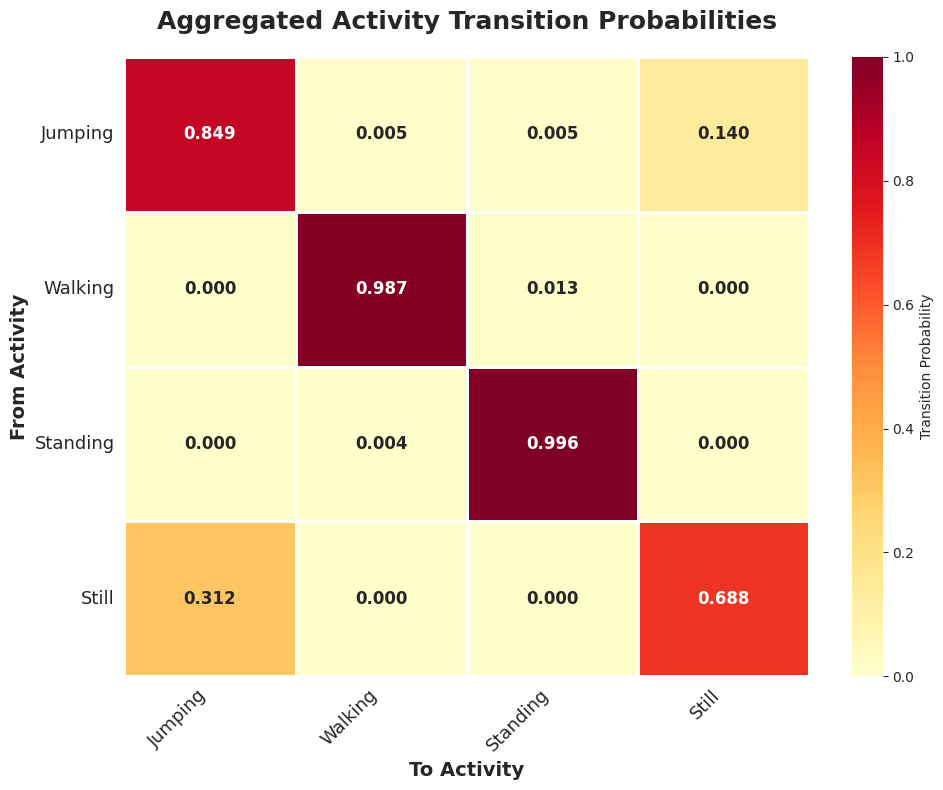


AGGREGATED TRANSITION PATTERNS (prob > 15%):

JUMPING:
  → Jumping: 84.9%

WALKING:
  → Walking: 98.7%

STANDING:
  → Standing: 99.6%

STILL:
  → Jumping: 31.2%
  → Still: 68.8%


In [76]:
# Example aggregation function
def aggregate_activities(classes):
    mapping = {
        'jumping': 'jumping',
        'jumpin': 'jumping',
        'walking': 'walking',
        'sitting': 'still',
        'standing': 'standing',
        'still': 'still'
    }
    return [mapping.get(c.lower(), 'unknown') for c in classes]

# Original HMM state labels
activity_classes = ['jumping', 'walking', 'standing', 'still']  # your HMM states

# Call the function
agg_matrix, agg_categories = plot_aggregated_transition_probabilities(
    hmm_model=global_hmm,               # or per_class_hmms
    original_classes=activity_classes,
    aggregate_activities_fn=aggregate_activities
)


In [78]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def aggregate_activities(activity_labels):
    """
    Map specific activities to main categories
    Still and Standing are treated as the same
    """
    aggregated = []
    for activity in activity_labels:
        # Handle nan/None values
        if pd.isna(activity) or activity is None or str(activity).lower() in ['nan', 'none', '']:
            continue  # Skip invalid values

        activity_lower = str(activity).lower().strip()

        if 'jump' in activity_lower:
            aggregated.append('jumping')
        elif 'walk' in activity_lower:
            aggregated.append('walking')
        elif 'sit' in activity_lower:
            aggregated.append('sitting')
        elif 'stand' in activity_lower or 'still' in activity_lower:
            aggregated.append('standing')

    return np.array(aggregated)

def clean_activity_classes(classes):
    """
    Remove nan and invalid values from activity classes
    """
    cleaned = []
    for cls in classes:
        if pd.notna(cls) and str(cls).lower() not in ['nan', 'none', '']:
            cleaned.append(cls)

    return np.array(cleaned)

def plot_global_aggregated_emissions(hmm_model, original_classes, feature_names):
    """
    Aggregate and visualize emission probabilities for Global HMM
    Compatible with both 'diag' and 'full' covariance types.
    """
    means = hmm_model.means_
    covars = hmm_model.covars_

    # Clean classes
    original_classes = clean_activity_classes(original_classes)

    # Map original classes to aggregated categories
    agg_mapping = {}
    for cls in original_classes:
        agg_cls = aggregate_activities([cls])
        if len(agg_cls) > 0:
            agg_mapping[cls] = agg_cls[0]

    # Get unique aggregated categories
    desired_order = ['jumping', 'walking', 'sitting', 'standing']
    agg_categories = [c for c in desired_order if c in set(agg_mapping.values())]

    # Select top features for visualization
    n_features_to_show = min(12, len(feature_names))
    feature_subset = feature_names[:n_features_to_show]

    # Aggregate emission means and variances
    n_agg = len(agg_categories)
    agg_means = np.zeros((n_agg, n_features_to_show))
    agg_stds = np.zeros((n_agg, n_features_to_show))
    agg_counts = np.zeros(n_agg)

    for i, cls in enumerate(original_classes):
        if cls in agg_mapping:
            agg_cat = agg_mapping[cls]
            agg_idx = agg_categories.index(agg_cat)

            agg_means[agg_idx] += means[i, :n_features_to_show]

            # Handle covariance type ('diag' or 'full')
            covar_i = covars[i]
            if covar_i.ndim == 2:
                # Full covariance matrix → use only the diagonal variances
                diag_vars = np.diag(covar_i)[:n_features_to_show]
            else:
                # Diagonal covariance vector
                diag_vars = covar_i[:n_features_to_show]

            agg_stds[agg_idx] += np.sqrt(diag_vars)
            agg_counts[agg_idx] += 1

    # Average
    for i in range(n_agg):
        if agg_counts[i] > 0:
            agg_means[i] /= agg_counts[i]
            agg_stds[i] /= agg_counts[i]

    # Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

    # Plot means
    sns.heatmap(agg_means, annot=True, fmt='.2f', cmap='coolwarm', center=0,
                xticklabels=feature_subset,
                yticklabels=[c.capitalize() for c in agg_categories],
                ax=ax1, cbar_kws={'label': 'Mean Value'},
                annot_kws={'size': 11, 'weight': 'bold'},
                linewidths=1, linecolor='gray')
    ax1.set_title('Global HMM: Aggregated Emission Means\n(Top 12 Features)',
                  fontsize=16, fontweight='bold', pad=15)
    ax1.set_xlabel('Features', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Activity Category', fontsize=12, fontweight='bold')
    ax1.tick_params(axis='x', rotation=45, labelsize=9)
    ax1.tick_params(axis='y', rotation=0, labelsize=12)

    # Plot standard deviations
    sns.heatmap(agg_stds, annot=True, fmt='.2f', cmap='viridis',
                xticklabels=feature_subset,
                yticklabels=[c.capitalize() for c in agg_categories],
                ax=ax2, cbar_kws={'label': 'Std Dev'},
                annot_kws={'size': 11, 'weight': 'bold'},
                linewidths=1, linecolor='gray')
    ax2.set_title('Global HMM: Aggregated Emission Std Dev\n(Top 12 Features)',
                  fontsize=16, fontweight='bold', pad=15)
    ax2.set_xlabel('Features', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Activity Category', fontsize=12, fontweight='bold')
    ax2.tick_params(axis='x', rotation=45, labelsize=9)
    ax2.tick_params(axis='y', rotation=0, labelsize=12)

    plt.tight_layout()
    plt.show()

    print("\n EMISSION STATISTICS:")
    print("="*70)
    for i, cat in enumerate(agg_categories):
        print(f"\n{cat.upper()}:")
        print(f"   Mean range: [{agg_means[i].min():.2f}, {agg_means[i].max():.2f}]")
        print(f"   Std Dev range: [{agg_stds[i].min():.2f}, {agg_stds[i].max():.2f}]")

    return agg_means, agg_stds, agg_categories




 GLOBAL HMM - EMISSION PROBABILITIES


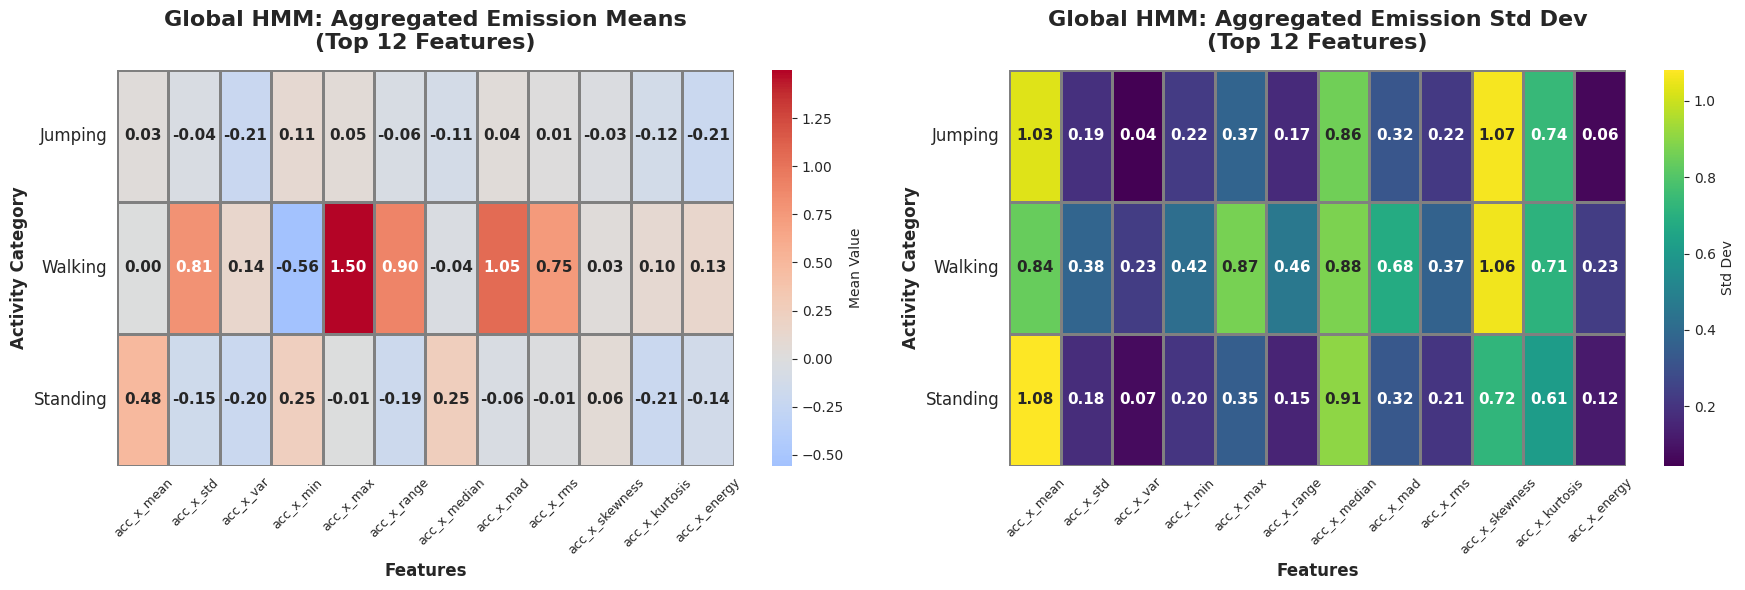


 EMISSION STATISTICS:

JUMPING:
   Mean range: [-0.21, 0.11]
   Std Dev range: [0.04, 1.07]

WALKING:
   Mean range: [-0.56, 1.50]
   Std Dev range: [0.23, 1.06]

STANDING:
   Mean range: [-0.21, 0.48]
   Std Dev range: [0.07, 1.08]


In [79]:
feature_names = X_train.columns.tolist()

# Global HMM Emissions
print("\n\n GLOBAL HMM - EMISSION PROBABILITIES")
print("="*70)
means_global, stds_global, cats_global = plot_global_aggregated_emissions(
    global_hmm, activity_classes, feature_names
)